# Programming Data Analysis Project 2
***
G00388113 John Loughnane. Programming for Data Analysis is a module of the Higher Diploma in Data Analytics in Computing.

## Data Analysis Project on Wisconsin Breast Cancer Original Dataset

In [1]:
from msilib.schema import Class
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import sklearn.neighbors as nei
from sklearn import svm
import seaborn as sns
import sklearn.model_selection as mod
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 1. Overview of Wisconsin Breast Cancer Dataset
***

The second Project in the Programming for Data Analysis module is on the Wisconsin Breast Cancer Dataset. I will be looking at the the Original Dataset which was released on the 15th July 1992. The Breast Cancer data was collected by Dr. William H. Wolberg (physician) in University of Wisconsin Hospitails, Madison, Wisconsin, U.S.A. It was collected over a 10 month period from January 1989 to November 1991. The data consists of 11 attributes of which 1 attribute is an identifier, 9 attributes are independent variables and 1 attribute is a dependent variable which is the *Class* attribute. Listed below are all thhe attributes in the dataset.

|  Attribute | Domain |
| --- | --- | 
| Sample code number | id number |
| Clump Thickness | 1 - 10 |
| Uniformity of Cell Size | 1 - 10 |
| Uniformity of Cell Shape | 1 - 10 |
| Marginal Adhesion | 1 - 10 |
| Single Epithelial Cell Size | 1 - 10 |
| Bare Nuclei | 1 - 10 |
| Bland Chromatin | 1 - 10 |
| Normal Nucleoli | 1 - 10 |
| Mitoses |  1 - 10 |
| Class: | (2 for benign, 4 for malignant) |

Attributes Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape, Marginal Adhesion, Single Epithelial Cell Size, Bare Nuclei, Bland Chromatin, Normal Nucleoli, Mitoses are integers between 1 and 10. So, these are discrete variables and have been scored from 1 to 10. The Class attribute is either one of two values 2 (Benign) or 4 (malignant), so each instance or row is either Benign or malignant. 
There are 699 rows in the dataset with class distribution of 458 Benign and 241 malignant. For the Bare Nuclei attribute there are 16 missing values. I will need to address these in the clean data phase.<br/>
The aim of the project is to carry out the following tasks on the Wisconsin Breast Cancer Dataset :

- 1. Provide an overview of the Dataset
- 2. Review literature on analysis carried out on the dataset and Classifiers used 
- 3. Statistical Analysis
- 4. Use a range of Classifiers and train the data (Modelling)
- 5. Compare the results on the Classifiers obtained from the Modeeling phase with the literature review
- 6. Discuss how the Wisconsin Breast Cancer Original Dataset could be extended

## 2. Data Understanding
***

The Data Understanding phase is to get a better feel of the dataset. 

- 1. Read in the Dataset
- 2. Check the first rows of the dataset
- 3. Check the attribute types
- 4. Check the number of rows and columns
- 5. Check the summary statistics of each attribute

### Read in the dataset

In [2]:
# Add the Column names and read in the Wisconsin breast Cancer Dataset
colnames=['Sample code number id number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class' ]
#index=('Iris Setosa', 'Iris Versicolour', 'Iris Virginica')
df = pd.read_csv("breast-cancer-wisconsin.data",names=colnames)

### Check the first rows of the dataset

In [3]:
# Check in the first 5 and last 5 rows of the data to see how it looks
df

,Sample code number id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


### Check the attribute types

In [4]:
# Check what type each attribute is 
df.dtypes

Sample code number id number     int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                     object
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

We can see that all attributes are integers apart from 'Bare Nuclei' which is of type Object. This is interesting but we know from the Dataset readme file that 'Bare Nuclei' has missing values so there maybe other characters in that column and so it was was given type of Object. We will need to change this to integer later on. 

In [5]:
# Check teh column names of the dataset
print(df.columns)

Index(['Sample code number id number', 'Clump Thickness',
       'Uniformity of Cell Size', 'Uniformity of Cell Shape',
       'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
       'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')


In [6]:
#breastCancer_describe = df.head(10)
#print(breastCancer_describe)

### Check the number of rows and columns

In [7]:
# Check number rows and columns
print(df.shape)

# Count by Class attribute so we can see number of Benigns and Malignant
print(df["Class"].value_counts())

(699, 11)
2    458
4    241
Name: Class, dtype: int64


Above we can see there are 458 rows of **Class 2** which are Benign and 241 rows of **Class 4** which are Malignant.

### Check the summary statistics of each attribute

In [8]:
# Run the describe function to check the summary statistice (mean, standard deviation, min, max & inter quartile values)
summary_all = df.describe().T
print(summary_all)

                              count          mean            std      min  \
Sample code number id number  699.0  1.071704e+06  617095.729819  61634.0   
Clump Thickness               699.0  4.417740e+00       2.815741      1.0   
Uniformity of Cell Size       699.0  3.134478e+00       3.051459      1.0   
Uniformity of Cell Shape      699.0  3.207439e+00       2.971913      1.0   
Marginal Adhesion             699.0  2.806867e+00       2.855379      1.0   
Single Epithelial Cell Size   699.0  3.216023e+00       2.214300      1.0   
Bland Chromatin               699.0  3.437768e+00       2.438364      1.0   
Normal Nucleoli               699.0  2.866953e+00       3.053634      1.0   
Mitoses                       699.0  1.589413e+00       1.715078      1.0   
Class                         699.0  2.689557e+00       0.951273      2.0   

                                   25%        50%        75%         max  
Sample code number id number  870688.5  1171710.0  1238298.0  13454352.0  
Cl

Above shows the summary statistics of the attibutes of the dataset. The mean value for Clump Thickness is 4.42, Uniformity of Cell Size is 3.13, Uniformity of Cell Shape is 3.2, Marginal Adhesion is 2.8, Single Epithelial Cell Size is 3.2, Bland Chromatin is 3.4, Normal Nuclei is 2.86 and Mitoses is 1.6.  

## 3. Literature review on Classifiers
***

I have chosen 3 journals/ articles on the Wisconsin Breast Cancer Original dataset to review. 

### Literature Review 1

#### Article

Analysis of Wisconsin Breast Cancer original dataset using data mining and machine learning algorithms for breast cancer prediction

#### Source of article
Journal of Science, Technology & Environment Informatics

#### Background

The Journal outlines the analysis carried out on the Wisconsin Breast Cancer original dataset using data mining and machine learning algorithms for breast cancer prediction. <br/>
It was carried out by the Dept. of Computer Science and Engineering, Pabna University of Science and Technology in Bangladesh.
The researchers were Md. Toukir Ahmed, Md. Niaz Imtiaz and Animesh Karmakar. The article was first published online on the 20th July 2020. The main focus of the paper was to use different machine learning classification algoritims to correctly predict the target Class. Then compare the different classifiers and find the most effective classifier in predicting the target class. 

#### URL
https://www.journalbinet.com/uploads/2/1/0/0/21005390/67.02.09.2020_analysis_of_wisconsin_breast_cancer_original_dataset_using_data_mining_and_machine_learning_algorithms_for_breast_cancer_prediction.pdf

**Classifiers used in the analysis :**
- Naïve Bayes 
- Support Vector Machine (SVM)
- Multilayer Perceptron (MLP)
- J48
- Random Forest

#### Insights

The paper indicates the importance of Performance metrics in order to find the best classifier. This is interesting as there are 10 performance parameters. These are Accuracy, Sensitivity, Specificity, Kappa statistics, Precision, Recall, F-measure, Matthew’s Correlation Coefficient (MCC), Receiver Operating Characteristic (ROC) Area and Precision-Recall Curves (PRC).
These are calculated froma confusion matrix :

| |Predicted YES | Predicted NO | 
| :---: | :---: | :---: |
| **Actual YES** | TP | FN | 
| **Actual NO** | FP | TN |

- TP represents the number of correctly classified positive instances.
- FP represents the number of misclassified positive instances.
- FN represents the number of misclassified negative instances.
- TN represents the number of correctly classified negative instances.

The main thing to take away is to use these performance parameters to compare the results of each classifier and from that determine the best classifier.

#### Method and Procedures

When testing each classifier they used 10 fold cross validation where the dataset is divided into 10 parts where 9 parts are used for training and one tenth for testing. This is carried out 10 times and each time a different one tenth is reserved for testing. The pereformance parameters used were accuracy, sensitivity, specificity, precision, Recall, ROC, PRC area.
It was found the best performing classifier was Naïve Bayes.<br/>
Next they removed one or two attributes and ran Naïve Bayes on the dataset again. After each run the added back in the attributes they removed and removed other attributes. It was found that removing the attribute "Single Epithelial Cell Size" gave better performnace.

#### Results

| Classifier Name | Accuracy  | Kappa Statistics | Precision | Recall | measure | MCC | ROC area | POC area |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| **Naïve Bayes** | **97.2779** | **0.9403** | **0.974** | **0.973** | **0.973** | **0.941** | **0.992** | **0.992** | 
| **J48** | 94.2693 | 0.8727 | 0.943 | 0.943 | 0.943 | 0.873 | 0.965 | 0.956 |
| **Random forest** | 95.5616 | 0.9241 | 0.966 | 0.966 | 0.966 | 0.924 | 0.988 | 0.987 |
| **SMO** | 96.1318 | 0.9144 | 0.961 | 0.961 | 0.961 | 0.914 | 0.958 | 0.944 |
| **Multilayer Perceptron** | 96.1318 | 0.9144 | 0.961 | 0.961 | 0.961 | 0.914 | 0.987 | 0.986 |

                                                             Table 1

You can see from Table 1 that Naïve Bayes which is on row 1 highlighted in bold is the best classifier. The results above are before the "Single Epithelial Cell Size" attribute is removed so the results for Naïve Bayes are even marginally better than above with "Single Epithelial Cell Size" attribute removed.

#### Conclusion

Out of the five classification algorithims that were tested the Naïve Bayes is the best performer of the five. The main points I learned when checking the Classifiers is : 

- Use Performance metrics to find the best classifier
- Look at removing the "Single Epithelial Cell Size" attribute to see if performance is better
- Review the Cross Validation method to see if it should be used 

### Literature Review 2 

#### Article
Prediction of benign and malignant breast cancer using data mining techniques

#### Source of Article
Sage Journals - Journal of Algorithms & Computational Technology

#### Background

The article outlines the analysis carried out on the Wisconsin Breast Cancer original dataset using machine learning approaches
to predict  breast cancer. <br/>
The analysis and research wasd carried out by Vikas Chaurasia, Saurabh Pal and BB Tiwari

#### URL
https://journals.sagepub.com/doi/full/10.1177/1748301818756225

#### Classifiers used in the analysis :

-  Naïve Bayes
- RBF Network
- J48

#### Insights

No real insights were provided with the paper.

#### Method and Procedure

There isn't much detail on how the Classifiers were used. For example we don't know whether they tried removing attributes to see if the classifiers gave better results. Also, we don't know how many times they ran the classifiers or if they used cross validation. 

#### Results

Table 2 shows the ranking of the algorithm against the performance measures. With Naïve Bayes coming out on top followed by RBF Network and J48

| Evaluation Criteria | Naïve Bayes  | RBF Network | J48 | 
| :---: | :---: | :---: | :---: | 
| Kappa statistic (KS) | 0.9127	| 0.9093 | 0.8799 | 
| Mean absolute error (MAE) | 0.0408 | 0.0662 |	0.0694 |
| Root mean squared error (RMSE) | 0.1994 | 0.1841 | 0.2229 | 
| Relative absolute error (RAE) | 9.0336% |	14.6542% | 15.352% | 
| Root relative squared error (RRSE) | 41.9578%	| 38.7285% | 46.8927% | 

                                                   Table 2

As part of the Confusion matrix when we calculate the Accuracy, Sensitivity and Specifcity the results are in Table3. With Naïve Bayes the best followed by RBF Network and j48.

| Methods || Accuracy (%)  | Sensitivity (%) | Specificity (%) | 
| :---: | :---: | :---: | :---: | :---: | 
| **Naïve Bayes** | |**97.36** | **97.4** | **97.90** | 
| **RBF Network** | |96.77 | 97.07 | 96.23 | 
| **J48** || 93.41 | 93.4 | 90.37 | 


                                                    Table 3

#### Conclusion

I didn't learn a whole lot from how they approached the analysis or ran the classifiers. The results achieved for both Naïve Bayes and J48 are similar to the results in the first review. 

### Literature Review 3 -

#### Article

Feature Importance Score-Based Functional Link Artificial Neural Networks for Breast Cancer Classification

#### Source of Article

National Library of Medicine - National Center for Biotechnology Information

#### Background

The article outlines the analysis carried out on the Wisconsin Breast Cancer original dataset and the Diagnostic Dataset. Six Classifiers were used in the analysis and this was carried out over the two Datasets which also gives us insight into which is teh best dataset to predict Benign or Malignant. The authors Shatakshi Singh, Sunil Kumar Jangir, Manish Kumar, Madhushi Verma, Sunil Kumar, Tarandeep Singh Walia, and S. M. Mostafa Kamal.

#### URL
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8994690/

#### Classifiers used in the analysis :

- SVM	
- Naïve Bayes	
- Random Forest	
- KNN	
- MLP	
- FLANN	

#### Insights

The Wisconsin Breast Cancer Diagnostic Dataset is better and predicting whether cancer is Malignant or Benign than the Original dataset. The FLANN algorithim gives an accuarcy of 99.41% which is pretty good.

#### Method and Procedure

They used the F-score to find the significance value of each feature or attribute in the Wisconsin Breast Cancer Original dataset. They then ran the six Classifiers against 5 features, 3 features and 2 features and you can see the Accuracy results in Table 4. The best 3 predictors of Breat Cancer in the Original dataset are Bare Nuclei, Clump Thickness and Normal Nucleoli according to the analysis. The confusion matrix is also used to get the performance metrics. 

#### Results

                      
                                                         Features Accuracy
| **Methods** || 5  | 3 | 2 | 
| :---: | :---: | :---: | :---: | :---: | 
| **SVM** | | 97.14% | 97.8%	| 95.7% | 
| **Naïve Bayes** | | 96.42% | 97.14% |	97.14% | 
| **Random Forest** || 97.14% |	97.14% | 93.57% | 
| **KNN** | | 95.71% | 95.71% |	97.8% | 
| **MLP** || 95.28% | 96.85% | 94.28% | 
| **FLANN** || 97.14% |	96.88% | 96.76% |
                                                                                 
                                                               Table 4 

Table 4 shows the Accuracy results when each Classifier is run against 5, 3 and 2 features. The best Classifier is Support Vector Machine (SVM) when it is run against 3 features, the Accuracy score is 97.8%. Also, KNeighbors (KNN) Classifier has an accuracy of 97.8% with just 2 features.   

#### Conclusion

To achieve the best results each Classifier was run against 5, 3 and 2 features in turn and to analyze which combination provided the best accuracy.  

## 4. Data Preparation
***

In the Data Preparation Phase we prepare and clean the data for Statistical Analysis and Modelling phases. If we don't clean the data it will affect the results when we carry out Univariate Analysis, Bivariate Analysis and Modelling. 

### Clean Data

In [9]:
# Run the shape function to check the number of rows and columns. Then we count on Class so Benign or Malignant
print(df.shape)

print(df["Class"].value_counts())

(699, 11)
2    458
4    241
Name: Class, dtype: int64


We can see there are 699 rows and 11 columns which match what is in the notes provided with the Wisconsin Breast cancer dataset

In [10]:
# Check the type of each attribute/ variable
df.dtypes

Sample code number id number     int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                     object
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

We can see they all the attributes are integers apart from the 'Bare Nuclei' which is an object. 

In [11]:
# Check for missing values and drop them
df.dropna(inplace=True)

In [12]:
# Check if there are any dropped rows
print(df.shape)

(699, 11)


We still have 699 rows so there aren't any blank fields.

In [13]:
# assign the Bare Nuclei column to questionMarkCheck
questionMarkCheck = df["Bare Nuclei"]

type(questionMarkCheck)

pandas.core.series.Series

In [14]:
# Iterate over questionMarkCheck and print out 'True' any field that has a ?
for i in questionMarkCheck:
    if i == '?':
        print("True - There is a ? mark here")
    else:
        pass
    

True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here
True - There is a ? mark here


There are 16 fields that have a **?** so we will remove these rows from the dataset.

In [16]:
# Remove the rows with '?' 
df = df[(df != '?').all(axis=1)]

In [17]:
# Check if rows have been removed 
print(df.shape)

print(df["Class"].value_counts())

(683, 11)
2    444
4    239
Name: Class, dtype: int64


There are now a total of 683 rows so 16 rows were removed

We need to convert the Bare Nuclei column from object dtype to int64

In [18]:
# convert Bare Nuclei from object to integer
df = df.astype({'Bare Nuclei':'int'})

In [19]:
# Just check to see 'Bare Nuclei' is now 
df.dtypes

Sample code number id number    int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                     int32
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

The bare Nuclei attributes are now converted from type object to type int32. The rest of the attributes are of type int64 but int32 is fine as the values are in range 1 - 10. The data is fine now to carry out Statistical Analysis.

## 5. Statistical Analysis
***

As part of the Statistical Analysis I will be carrying out the following tasks.

- Univariate Analysis
    - Pie Chart
    - Boxplots
    
    
- Bivariate Analysis
  - Bar Plots
  - Correlation Coefficient

### Univariate Analysis

Univariate analysis is looking at one variable and understanding the distribution of values for that one value.

In [20]:
# Check the first 10 rows of data to see how it is
df.head(10)

,Sample code number id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


#### Pie Chart

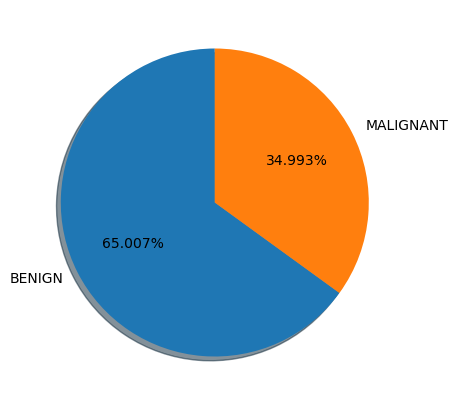

In [21]:
# Create a Pie Chart by Class to show the percentage of Benign and Malignant 
plt.figure(figsize=(5,5))
plt.pie(df['Class'].value_counts(),startangle=90,autopct='%1.3f%%',labels=['BENIGN','MALIGNANT'],shadow=True)
plt.show()

From the Pie chart we can see that 65% are Benign and 34.9% are Malignant so two thirds of the data are patients that don't have cancer and one third have Cancer.

In [22]:
summary_all = df.describe().T
print(summary_all)

                              count          mean            std      min  \
Sample code number id number  683.0  1.076720e+06  620644.047655  63375.0   
Clump Thickness               683.0  4.442167e+00       2.820761      1.0   
Uniformity of Cell Size       683.0  3.150805e+00       3.065145      1.0   
Uniformity of Cell Shape      683.0  3.215227e+00       2.988581      1.0   
Marginal Adhesion             683.0  2.830161e+00       2.864562      1.0   
Single Epithelial Cell Size   683.0  3.234261e+00       2.223085      1.0   
Bare Nuclei                   683.0  3.544656e+00       3.643857      1.0   
Bland Chromatin               683.0  3.445095e+00       2.449697      1.0   
Normal Nucleoli               683.0  2.869693e+00       3.052666      1.0   
Mitoses                       683.0  1.603221e+00       1.732674      1.0   
Class                         683.0  2.699854e+00       0.954592      2.0   

                                   25%        50%        75%         max  


Above summary statistics show the number of rows which is 683 and 8 attributes and the Class. For each attribute it gives the mean, standard deviation, min and max range, median and 25% and 75% perecentiles. 

#### Boxplots

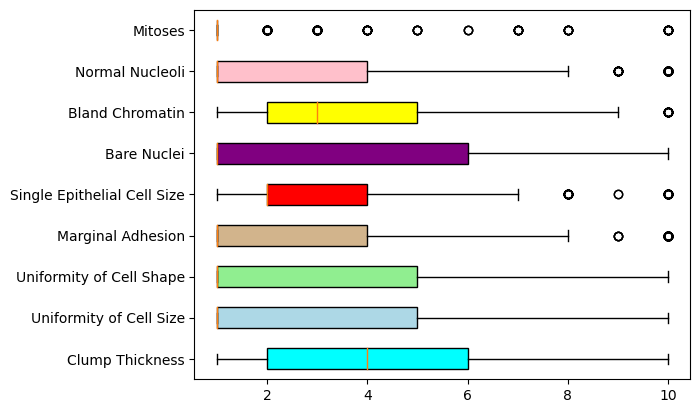

In [23]:
box_plot_data=[df['Clump Thickness'], df['Uniformity of Cell Size'], df['Uniformity of Cell Shape'], df['Marginal Adhesion'], df['Single Epithelial Cell Size'], df['Bare Nuclei'], df['Bland Chromatin'], df['Normal Nucleoli'], df['Mitoses']]
box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses'])
 
colors = ['cyan', 'lightblue', 'lightgreen', 'tan','red', 'purple', 'yellow', 'pink', 'orange']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

From the Boxplots of the data all the attributes are positively skewed. With Clump Thickness the nearest to a normal distribution. You can see that Mitoses, Normal Nucleoli, Bare Nuclei, Marginal Adhesion, Uniformity of Cell Shape and Uniformity of Cell Size having a median around 1. Normal Nucleoli, Bland Chromatin, Single Cell Size and Marginal Adhesion have some outliers but Mitoses has alot of outliers as majority of the values are 1.

In [24]:
#cols = 3
#rows = 3
#num_cols = df.select_dtypes(include='object').columns
#fig = plt.figure(figsize= (15,9))
#for i, col in enumerate(num_cols):
#    
#    ax=fig.add_subplot( rows, cols, i+1)
#    
#    sns.boxplot(x=df[col], ax=ax)
#    
#fig.tight_layout()  
#plt.show()

### Bivariate Analysis

Bivariate analysis is the analysis of two variables to see if there is a relationship or association between them. For this case I will look at each of the following variables 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli' and 'Mitoses' with the Class variable to see if there are relationships. 

In the Class attribute it would be better to change the integer values 2 and 4 to benign and Malignant so the graphs can be read more easily. 

In [25]:
# Change the integer value 2 to a string Benign and integer value 4 to String value Malignant.
df.loc[df["Class"] == 2, "Class"] = 'Benign'
df.loc[df["Class"] == 4, "Class"] = 'Malignant'

In [26]:
# Just check the Class attribute
df.dtypes

Sample code number id number     int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                      int32
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                           object
dtype: object

The Class attribute is now of type object. It will be clearer in graphs to see Benign or Malignant instead of the integer values 2 or 4.

#### Bar plots

##### Clump Thickness

In [27]:
# Exract Class and Clump Thickness from the dataframe so we can see the distribution
clumpThickness = df[['Class','Clump Thickness']].value_counts().sort_index()

In [28]:
clumpThickness

Class      Clump Thickness
Benign     1                  136
           2                   46
           3                   92
           4                   67
           5                   83
           6                   15
           7                    1
           8                    4
Malignant  1                    3
           2                    4
           3                   12
           4                   12
           5                   45
           6                   18
           7                   22
           8                   40
           9                   14
           10                  69
dtype: int64

We can see from the data that for range 1 or 2 that they are mostly Benign with 7 values Malignant.<br/>
If the data is in a bar plot it can be seen better.

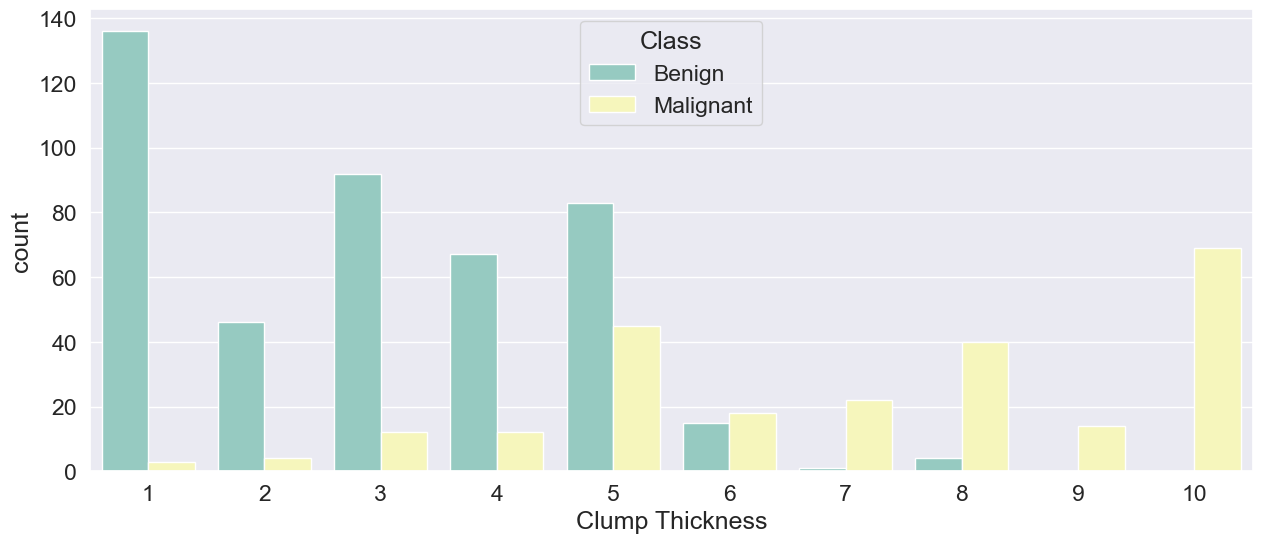

In [29]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Clump Thickness', hue = 'Class', data = df, palette = 'Set3')
plt.show()

The plot shows if the Clump thickness value is 6 or above there is a good chance the Cancer is Malignant. Benign is mostly between 1 to 5. 

##### Bare Nuclei

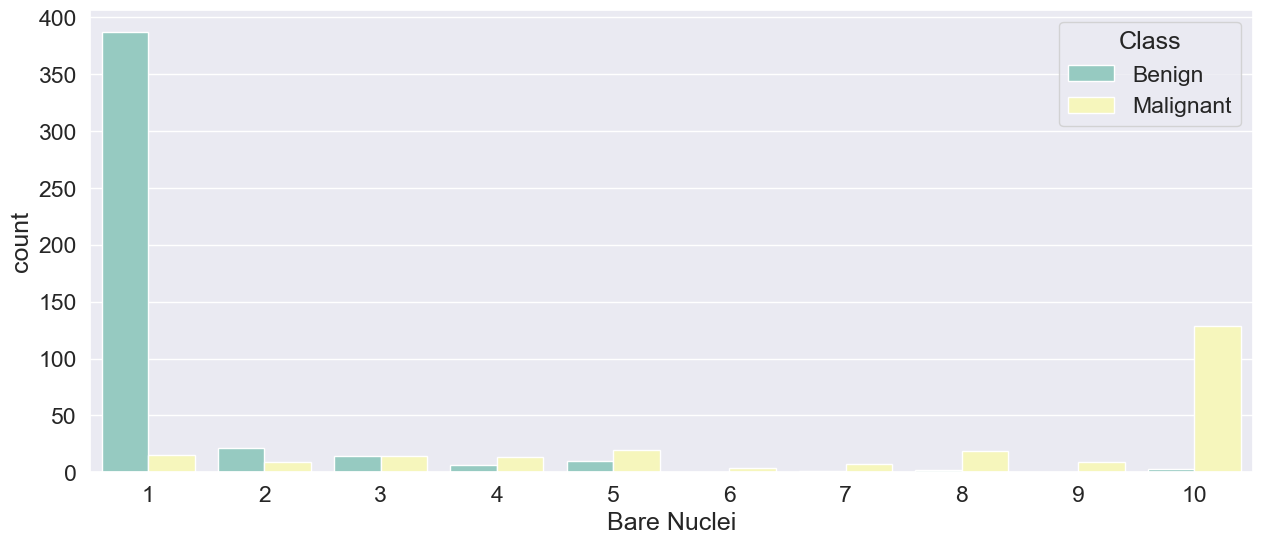

In [30]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Bare Nuclei', hue = 'Class', data = df, palette = 'Set3')
plt.show()

For Bare Nuclei a value of 1 is benign apart from a few values. A value of 4 or above and there is a good chance the cancer is malignant. Bare Nuclei could be a good predictor of whether the cancer is Benign or Malignant.

##### Single Epithelial

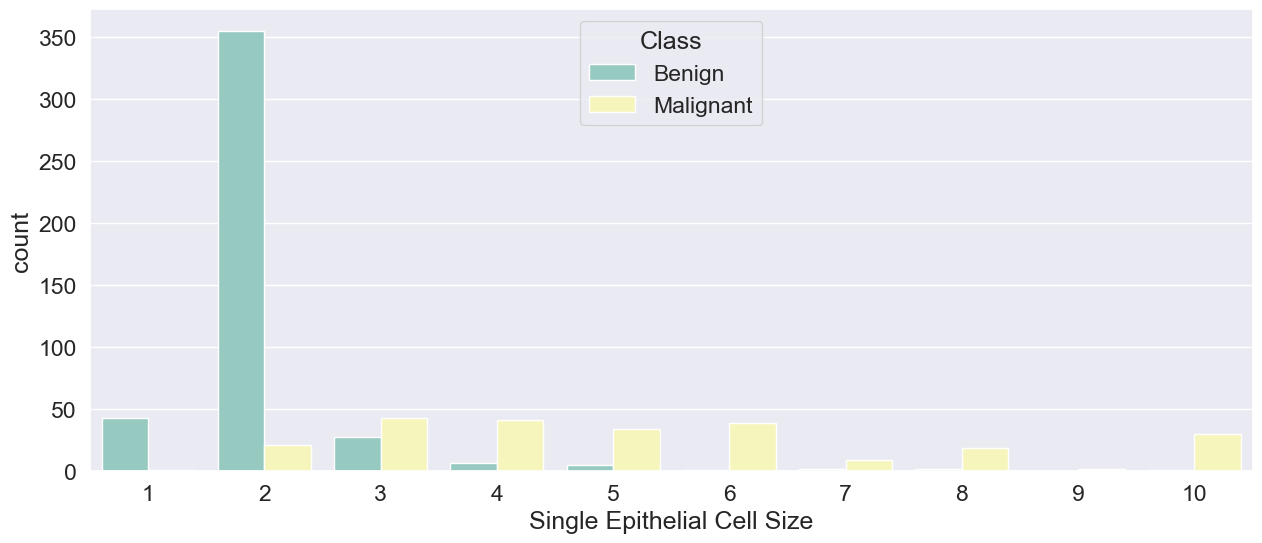

In [31]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Single Epithelial Cell Size', hue = 'Class', data = df, palette = 'Set3')
plt.show()

The median is 2 for Single Epithelial Size and if the value is 2 or under its Benign, if its 4 or above the chances are the Cancer is Malignant. 

##### Mitoses

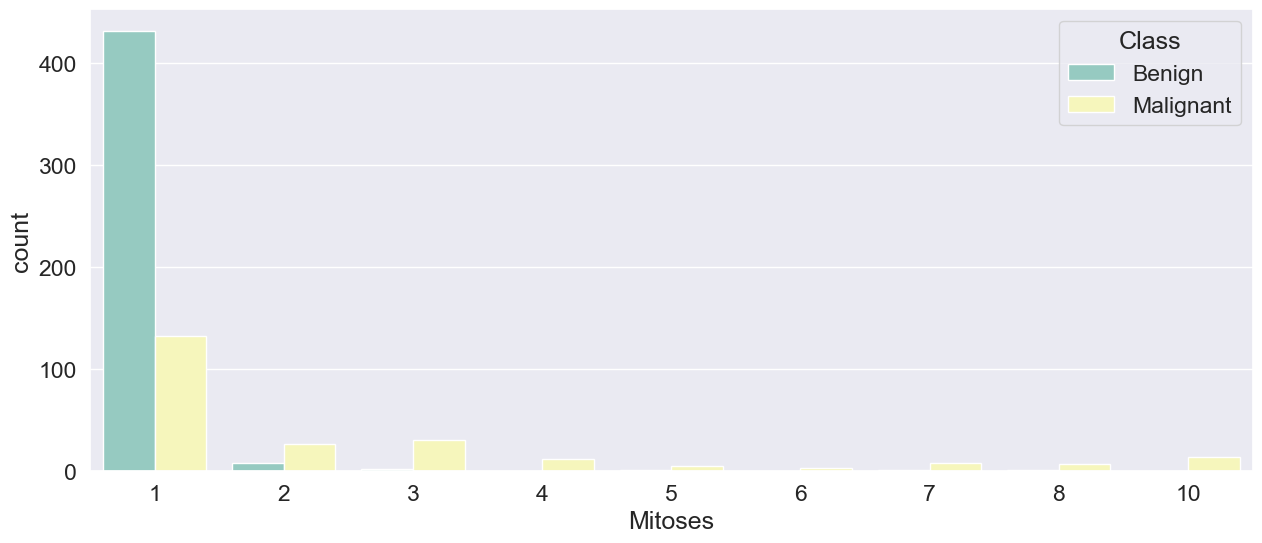

In [32]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Mitoses', hue = 'Class', data = df, palette = 'Set3')
plt.show()

The median for Mitoses is 1 so you can see that 550 out of 683 records fall here. For the value 1 75% are Benign and 25% are Malignant so it doesn't look like this would be a good predictor. If the value is 3 or above the chances are the Cancer is Malignant. 80% of the data is value 1 and 25% of that are Malignant so it appears that its not a good indicator whether its Benign or Malignant.

##### Uniformity of Cell Size

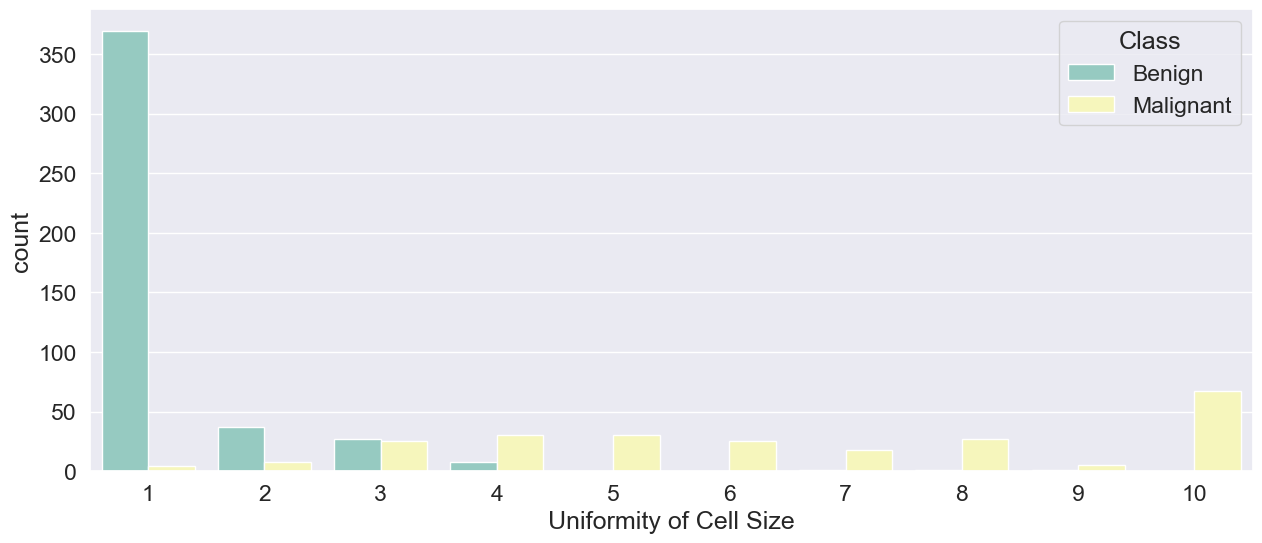

In [33]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Uniformity of Cell Size', hue = 'Class', data = df, palette = 'Set3')
plt.show()

The median for Uniformity of Cell Size is around 1 again and very few data points are Malignant around this value. This could possibly be a good indicator of whether the cancer is Benign or Malignant.

##### Uniformity of Cell Shape

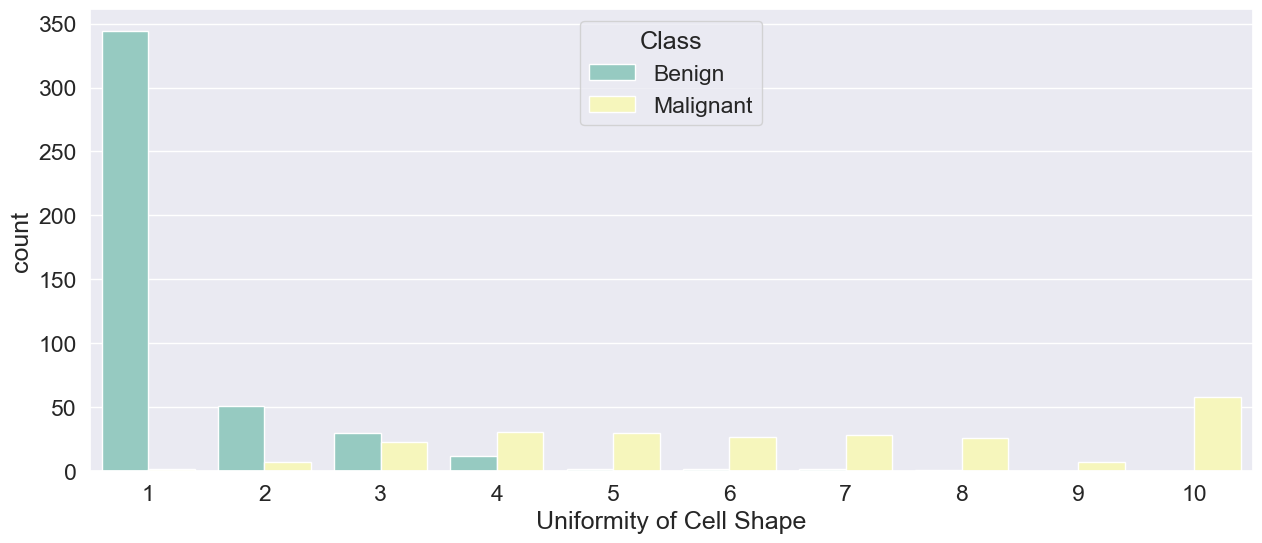

In [34]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Uniformity of Cell Shape', hue = 'Class', data = df, palette = 'Set3')
plt.show()

The median for Uniformity of Cell Shape is around 1 again and very few data points are Malignant around this value. 
This again could be a good indicator of whether the cancer is Benign or Malignant.

##### Marginal Adhesion

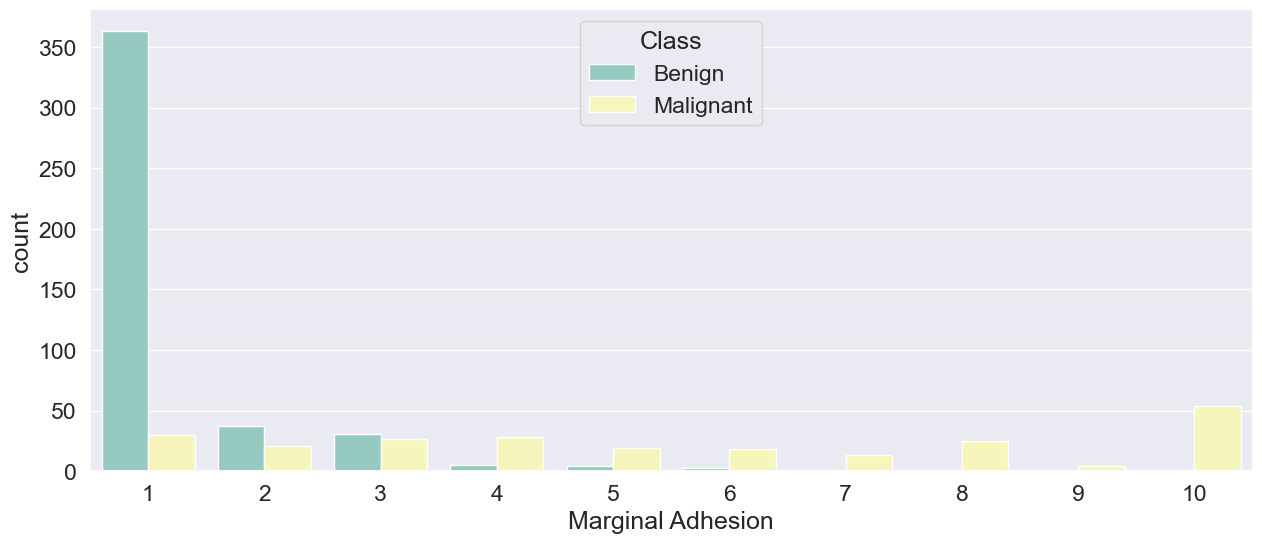

In [35]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Marginal Adhesion', hue = 'Class', data = df, palette = 'Set3')
plt.show()

For Marginal Adhesion the median is 1 and the majority of values for Benign fall between 1 and 3. Again high values of 4 and above indicate the cancer is Malignant. 

##### Bland Chromatin

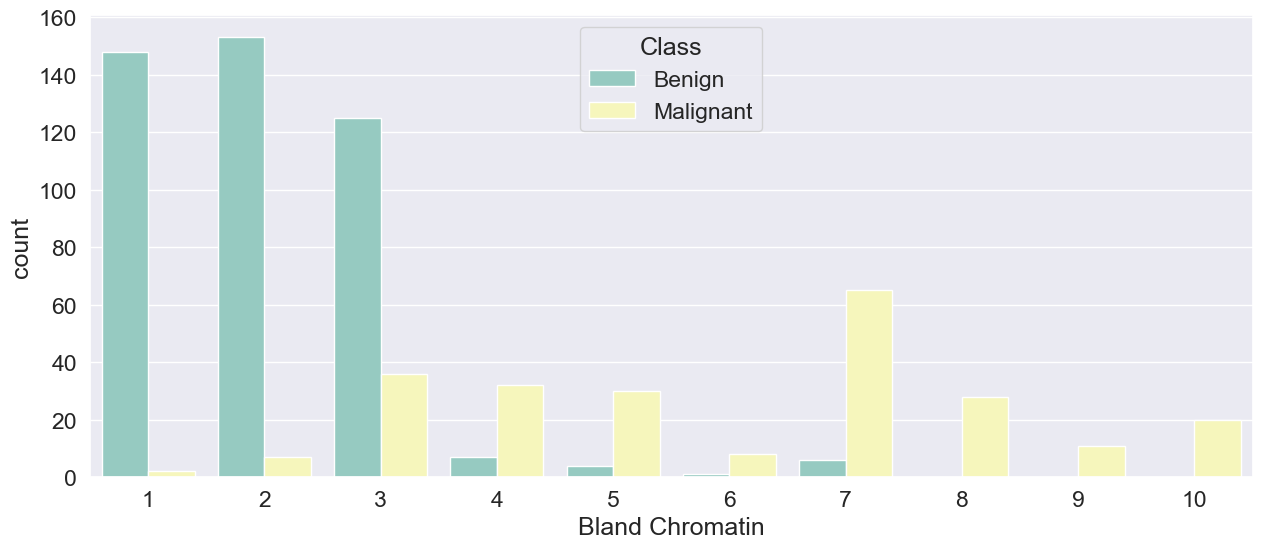

In [36]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Bland Chromatin', hue = 'Class', data = df, palette = 'Set3')
plt.show()

The median for Bland Chromatin is 3. Again low numbers especially 1 and 2 indicate Benign whereas 4 and above indicate the cancer is Malignant. This maybe a good predictor but we will see when we carry out the multivariate analysis.

##### Normal Nucleoli

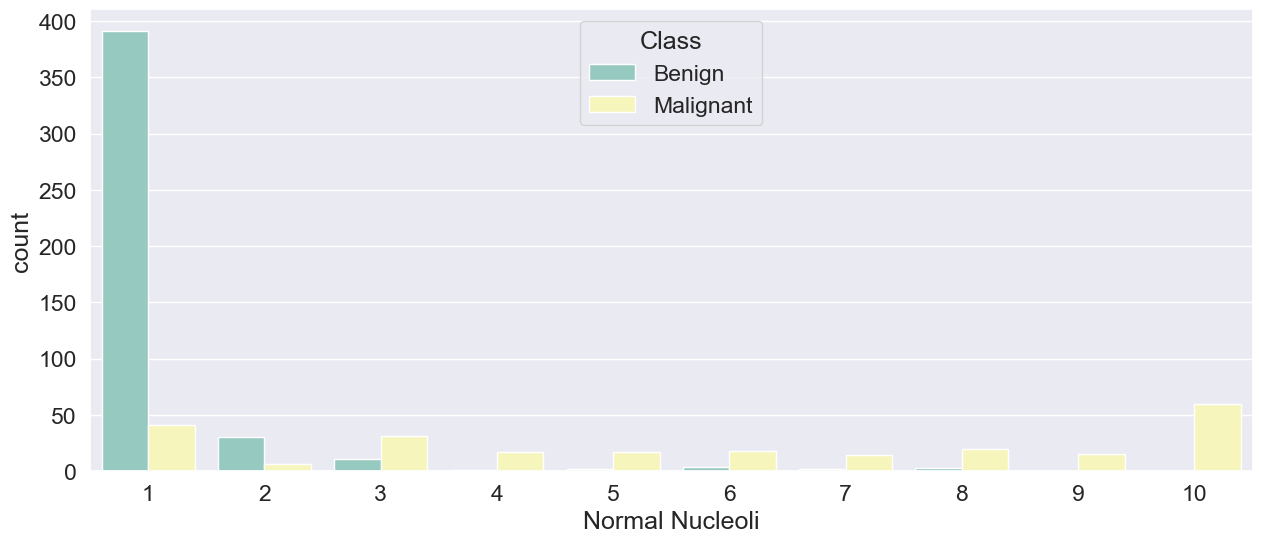

In [37]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Normal Nucleoli', hue = 'Class', data = df, palette = 'Set3')
plt.show()

For Normal Nucleoli nearly 50% of the count is 1. Values 1 or 2 indicate Benign and values 3 and above indicate the Cancer is Malignant.

#### Correlation Coefficient

Using the Correlation Coeffoicient we can tell what variables have a positive correlation or relationship with the Class variable. These variables will be the strongest indicators to predict whether the Cancer is Benign or Malignant.

I need to change the Class back to an integer to carry out the corelation coefficient.

In [38]:
# Change the object from Benign and integer to 2 and 4 it will be easier to review.
df.loc[df["Class"] == 'Benign', "Class"] = 2
df.loc[df["Class"] == 'Malignant', "Class"] = 4

In [39]:
# Check what type each attribute is 
df.dtypes

Sample code number id number     int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                      int32
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                           object
dtype: object

In [40]:
# convert Bare Nuclei from object to integer
df = df.astype({'Class':'int'})

In [41]:
# Check what type each attribute is 
df.dtypes

Sample code number id number    int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                     int32
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int32
dtype: object

##### Correlation Coefficient

In [42]:
df.corr()

,Sample code number id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number id number,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
Clump Thickness,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


Look at the correlation Coefficient values under the Class column there are 3 variables with Correlation Coefficients of 0.82 and they are Uniformity of Cell Size, Uniformity of Cell Shape and Bare Nuclei. If we were to choose a fourth variable it would have to be Bland Chromatin which has a value of 0.75. These 4 variables would be the best indicators to predict whether the Cancer is Benign or Malignant.  

#### Correlation Heatmap

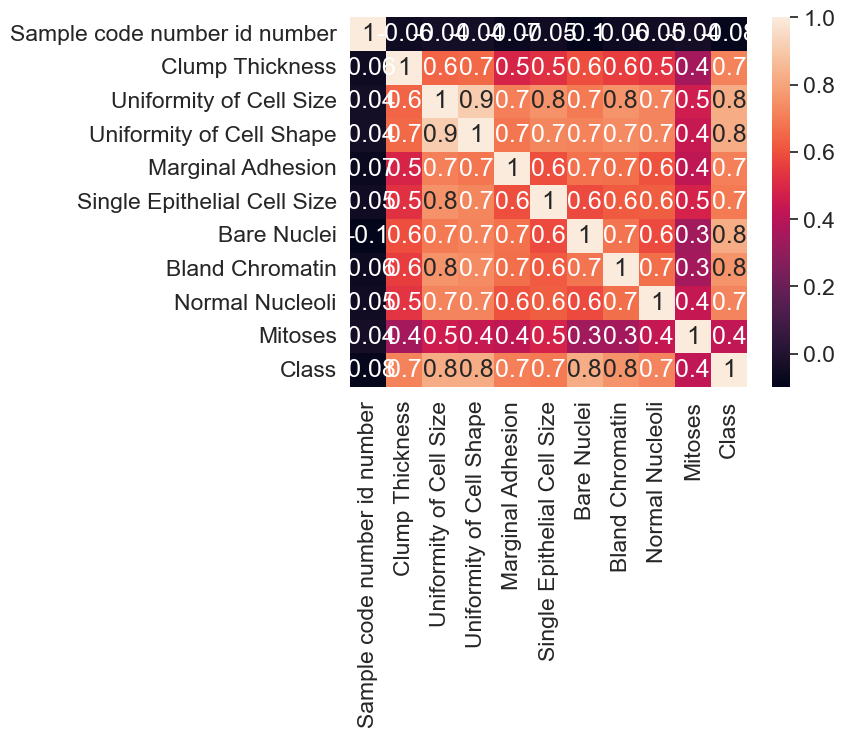

In [43]:
sns.heatmap(df.corr(),annot=True,fmt='.1g')
plt.show()

The best predictors for the Class attribute from the Correlation heatmap are Bland Chromatin (0.8), Bare Nuclei (0.8), Uniformity of Cell size (0.8) and Uniformity of Cell Shape (0.8).

## 6. Modelling 
***

In the Modelling phase I will be testing the following Classifiers against the Wisconsin Breast Cancer Original Dataset :

- K-Nearest Neighbor (KNN)
- Random Forest
- Logistic Regression
- Gaussian Naive Bayes
- Support Vector Machine (SVM)

In [343]:
from scipy.stats import chi2_contingency
import math

In [344]:
df.tail()

,Sample code number id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [47]:
df.head()

,Sample code number id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [48]:
# assign the Inputs and Outputs to run the Classifiers
inputs = df[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']]
outputs = df['Class']

#### Chisquare

Here we will use Chisquare to check gain the best attributes to predict whether benign or malignant

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 10 features
select_feature = SelectKBest(chi2, k=5).fit(inputs, outputs)
# let's print the number of total and selected features
# this is how we can make a list of the selected features
selected_feature_chi2 = inputs.columns[select_feature.get_support()]
# let's print some stats
print('total features: {}'.format((inputs.shape[1])))
print('selected features: {}'.format(len(selected_feature_chi2)))
print('Chosen best 5 feature by Chi2:',selected_feature_chi2)

total features: 8
selected features: 5
Chosen best 5 feature by Chi2: Index(['Uniformity of Cell Size', 'Uniformity of Cell Shape',
       'Marginal Adhesion', 'Bland Chromatin', 'Normal Nucleoli'],
      dtype='object')


We can see out of the 8 features tested that chisquare has chosen 5 attributes which are 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Bland Chromatin' and 'Normal Nucleoli'. These results are the same as the correlation tests run earlier where teh same attributes are chosen.

In [50]:
# Just check there are 11 columns and 683 rows in the dataset.
print(df.shape)

(683, 11)


In [51]:
# Checking the counts against the class so there are 444 Benign and 239 Malignant
print(df["Class"].value_counts())

2    444
4    239
Name: Class, dtype: int64


In [52]:
df.isnull().sum()

Sample code number id number    0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                     0
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [53]:
df.dropna(inplace=True)

In [55]:
#df['Clump Thickness'] = df['Clump Thickness'].astype(int)

In [53]:
#df['Uniformity of Cell Size'] = df['Uniformity of Cell Size'].astype(int)

In [54]:
#df['Uniformity of Cell Shape'] = df['Uniformity of Cell Shape'].astype(int)

In [55]:
#df['Marginal Adhesion'] = df['Marginal Adhesion'].astype(int)

In [56]:
#df['Single Epithelial Cell Size'] = df['Single Epithelial Cell Size'].astype(int)

In [57]:
#df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)

In [58]:
#df['Bland Chromatin'] = df['Bland Chromatin'].astype(int)

In [59]:
#df['Normal Nucleoli'] = df['Normal Nucleoli'].astype(int)

In [60]:
#df['Mitoses'] = df['Mitoses'].astype(int)

### KNeighbors Classifier

K-Nearest Neighbor is a classifier that basicvally classifies a data point based on its few nearest neighbors. The value of 'k' determines how many neighbors are used in the classification.  

For Modelling assign the attributes which will be the inputs and the Class attribute will be the output

In [54]:
# Inputs and Outputs
inputs = df[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']]
outputs = df['Class']

In [55]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [56]:
print(inputs_test.shape)

inputs_test.head()

(226, 8)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses
308,7,8,7,6,4,8,8,4
51,5,3,3,4,2,3,4,1
692,3,1,1,1,2,1,1,1
400,3,10,8,7,6,9,3,8
76,1,1,4,1,2,2,1,1


In [57]:
# Get an instance of kNeighbors 
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [58]:
type(df['Sample code number id number'])

pandas.core.series.Series

In [59]:
# fit the 
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier()

In [60]:
(knn.predict(inputs_test)==outputs_test).sum()

214

In [61]:
kValue = (knn.predict(inputs_test)==outputs_test).sum()
print("The perecentage of the Class attribute prefixted correctly : ")
(kValue/226)*100

The perecentage of the Class attribute prefixted correctly : 


94.69026548672566

In [62]:
#Y_pred = classifier.predict(inputs_test)
Y_pred = knn.predict(inputs_test)

In [63]:
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix(outputs_test, Y_pred)

In [64]:
cm

array([[140,   7],
       [  5,  74]], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(outputs_test,Y_pred)

In [66]:
accuracy

0.9469026548672567

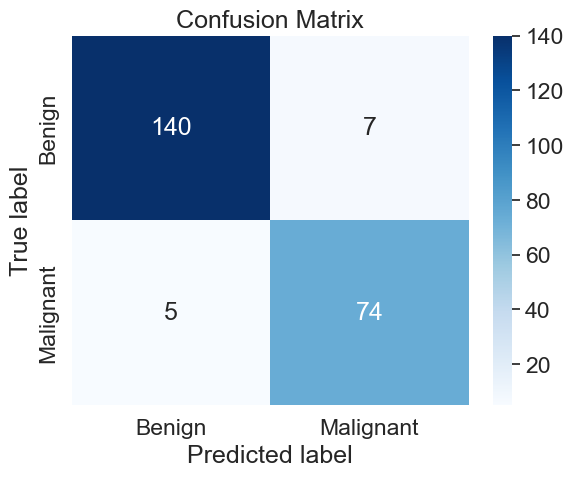

In [67]:
ConfMatrix = confusion_matrix(outputs_test, Y_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Benign', 'Malignant'], yticklabels = ['Benign', 'Malignant'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

True Negative (Top-Left Quadrant)<br/>
False Positive (Top-Right Quadrant)<br/>
False Negative (Bottom-Left Quadrant)<br/>
True Positive (Bottom-Right Quadrant)

The top left Quadrant is 140 that were predicted as Benign and they are actually Benign so they are correct The bottom right Quadrant is 74 predicted as Malignant and they are actually Maligant so they are correct. The top right Quadrant are 7 predicted as Benign but actually are Malignant so this is not good The bottom left Quadrant shows 5 predicted as Malignant and they are actually Benign. At least these patients would get a second test and may show up as Benign on the second test. It shows that even an accuracy of 94.69% there are 12 incorrect predictions out of 226. It shows that its extremely important to achieve the highest Accuracy as possible.

In [131]:
# The classification_report method is useful to show accuracy, precision etc... results
print(classification_report(outputs_test, Y_pred))

              precision    recall  f1-score   support

           2       0.97      0.95      0.96       147
           4       0.91      0.94      0.92        79

    accuracy                           0.95       226
   macro avg       0.94      0.94      0.94       226
weighted avg       0.95      0.95      0.95       226



**Accuracy** is the number of samples correctly classified out of all the samples present in the test set.

**Precision** is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

**Recall** is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

The **F1 score** is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. 

In [110]:
from sklearn import metrics
#Accuracy = metrics.accuracy_score(outputs_test, Y_pred)

In [111]:
#Accuracy

In [112]:

#print('Accuracy is : ' + str((136 + 77)/(136 + 77 + 8 + 5)))

In [113]:
#scores = cross_val_score(knn, inputs, outputs, cv=10, scoring='accuracy')

In [114]:
#print(scores)

#print(scores.mean())

In [115]:
#scores = cross_val_score(knn, inputs, outputs, cv=10, scoring='neg_root_mean_squared_error')

In [116]:
#print(scores)

#print(scores.mean())

We need to find the best value of **n_neighbors** in the KNeighbors classifier so we can use the for loop below and use a range for n_neighbors between 1 and 40. Cross fold validation = 10 will be carried out for each value of **cv** and the mean score will be given. The parameter **cv** represents the value of Cross fold Validation. In this case **cv** = 10 so the dataset is divided into 10 with one tenth being the test dataset and nine tenths the training dataset. This will be run 10 times and each time a different one tenth will be used as the test dataset. The other nine tenths of the datset will be used for training. It will be run against an instance of KNeighbor Classifier and each time the accuracy will be checked against the test dataset and the result appended to the list k_scores.   

In [117]:
# k_range will be the values we will use for the parameter n_neighbors in the KNeighbor Classifier.
k_range = range(1, 41)
# k_scores is a list which will hold the mean accuracy value from each Cross Validation run
k_scores = []

for k in k_range:
    knn = nei.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, inputs, outputs, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

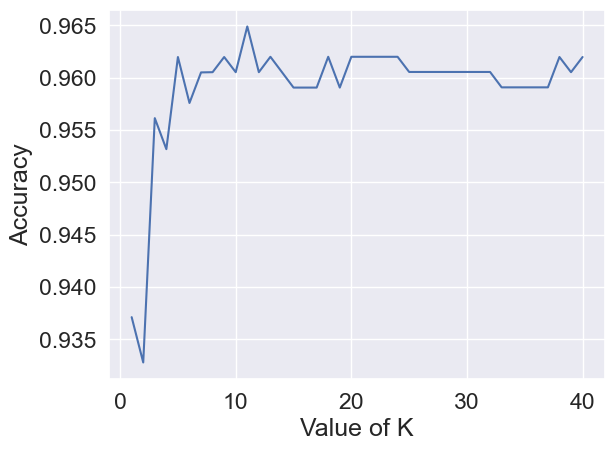

In [118]:
# A line plot which shows the accuracy for each Value of K(n_neighbors) for KNN
sns.lineplot(x = k_range, y = k_scores)
plt.ylabel("Accuracy")
plt.xlabel("Value of K")
plt.show()

The best value of K for KNeighbors is 11 which gives a mean Acccuracy of 0.965

In [119]:
# We will create a instance of KNeighbors with n_neighbors = 11
knn = nei.KNeighborsClassifier(n_neighbors=11)

In [120]:
# Run Cross fold validation = 10 and get the Accuracy
scores = cross_val_score(knn, inputs, outputs, cv=10, scoring='accuracy')

In [121]:
print(scores)

print(scores.mean())

[0.92753623 0.98550725 0.95652174 0.92647059 0.98529412 0.92647059
 0.98529412 0.98529412 0.98529412 0.98529412]
0.9648976982097185


We can se when we use KNeighbors = 11 on the Wisconsin Breast Cancer Original dataset we get an Accuracy of 0.9648 or 96.48%

### RandomForest Classifier

A Random Forest Algorithm is a supervised machine learning algorithm which is extremely popular and is used for Classification and Regression problems in Machine Learning. We know that a forest comprises numerous trees, and the more trees more it will be robust. Similarly, the greater the number of trees in a Random Forest Algorithm, the higher its accuracy and problem-solving ability.  Random Forest is a classifier that contains several decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

In [255]:
# Split the dataset into 77% training dataset and 33% test dataset
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [256]:
# RandomForest Classifier library
from sklearn.ensemble import RandomForestClassifier

# Create and instance of the RandomForest Classifier 
# n_estimator is the number of trees which is 200 and criterion = 'entropy'
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 10)
# fit the classifier
classifier.fit(inputs_train, outputs_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=10)

In [257]:
# try predict from the test dataset and the predicted out pust are Y_pred 
Y_pred = classifier.predict(inputs_test)

In [258]:
from sklearn.metrics import confusion_matrix
# run confusion matrix against the predicted dataset and the actual test dataset
cm = confusion_matrix(outputs_test, Y_pred)

In [259]:
# The output of the Confusion matrix. We'll look at it in detail in 
cm

array([[131,   2],
       [ 10,  83]], dtype=int64)

In [260]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(outputs_test,Y_pred)

In [261]:
accuracy

0.9469026548672567

In [262]:
print(classification_report(outputs_test, Y_pred))

              precision    recall  f1-score   support

           2       0.93      0.98      0.96       133
           4       0.98      0.89      0.93        93

    accuracy                           0.95       226
   macro avg       0.95      0.94      0.94       226
weighted avg       0.95      0.95      0.95       226



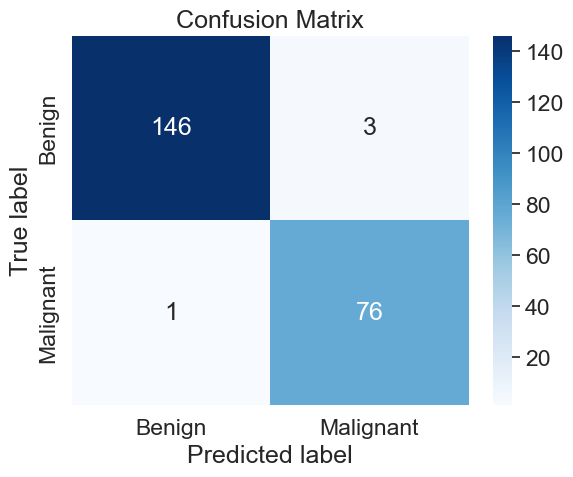

In [142]:
ConfMatrix = confusion_matrix(outputs_test, Y_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Benign', 'Malignant'], yticklabels = ['Benign', 'Malignant'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

- True Negative (Top-Left Quadrant)
- False Positive (Top-Right Quadrant)
- False Negative (Bottom-Left Quadrant)
- True Positive (Bottom-Right Quadrant)

The top left Quadrant is 146 that were predicted as Benign and they are actually Benign so they are correct
The bottom right Quadrant is 76 predicted as Malignant and they are actually Maligant so they are correct
The top right Quadrant are 3 predicted as Benign but actually are Malignant.
The bottom left Quadrant shows 1 predicted as Malignant and they are actually Benign. 

Running a Classifier once is not accurate enough so I will use Cross fold validation to get a better picture of the accuracy.

In [148]:
#RandomForest = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 10)
RandomForest = RandomForestClassifier(n_estimators = 400, max_depth = 5, criterion = 'entropy')

In [149]:
scores = cross_val_score(RandomForest, inputs, outputs, cv=10, scoring='accuracy')

In [150]:
print(scores)

print(scores.mean())

[0.92753623 0.97101449 0.95652174 0.92647059 0.97058824 0.98529412
 0.97058824 0.98529412 0.97058824 0.98529412]
0.964919011082694


In [151]:
#k_range = range(1, 41)
#k_scores = []

#for k in k_range:
#    knn = nei.KNeighborsClassifier(n_neighbors=k)
#    scores = cross_val_score(knn, inputs, outputs, cv=10, scoring='accuracy')
#    k_scores.append(scores.mean())


estimate_range = range(151, 200)
estimate_scores = []

for n in estimate_range:
    rfc = RandomForestClassifier(n_estimators = n, max_depth = 5, criterion = 'entropy')
    scores = cross_val_score(rfc, inputs, outputs, cv=10, scoring='accuracy')
    estimate_scores.append(scores.mean())

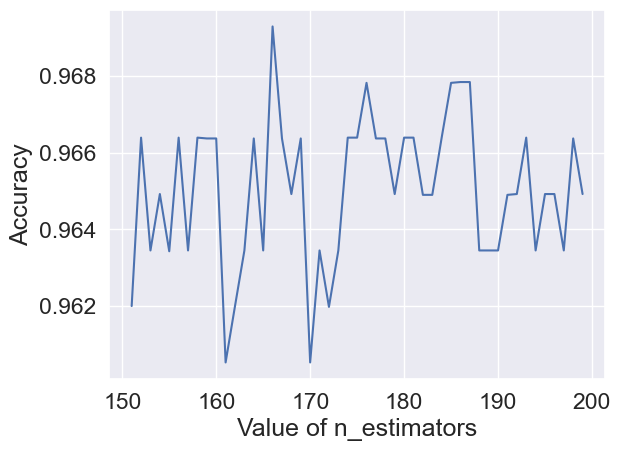

In [152]:
sns.lineplot(x = estimate_range, y = estimate_scores)
plt.ylabel("Accuracy")
plt.xlabel("Value of n_estimators")
plt.show()

In [345]:
# To find teh optimal values create a dictionary for teh parameters and selected values
params = {'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400], 'max_depth': [2, 3, 4, 5], 'criterion': ['entropy', 'gini']}

In [346]:
# Create an instance of RandomForest
rfc = RandomForestClassifier()
# Create an instance of GrodSearchCV to find the optimal values for the RandomForest Classifier and Wisconsin Breast Cancer Datset
rfc = GridSearchCV(estimator=rfc, param_grid=params, cv=5, n_jobs=5, verbose=1)

In [347]:
rfc.fit(inputs, outputs)
print(rfc.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 80}


In [348]:
# The values for each parameter after running GridSearchCV are 'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 80
forest = RandomForestClassifier(n_estimators = 80, max_depth = 5, criterion = 'entropy')

In [349]:
scores = cross_val_score(forest, inputs, outputs, cv=10, scoring='accuracy')

In [350]:
print(scores)

print(scores.mean())

[0.92753623 0.97101449 0.95652174 0.92647059 0.95588235 0.98529412
 0.97058824 0.98529412 0.97058824 0.98529412]
0.9634484228473997


When we run the RandomForest Classifier on the Wisconsin Breast Cancer Original dataset we get an Accuracy of 0.9634 or 96.34%

### Logistic Regression

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In [319]:
# Import LogisticRegression library
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [323]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)
scaler = StandardScaler()
# standardize the data 
inputs_train = scaler.fit_transform(inputs_train)

In [324]:
# Create an instance of LogisticRegression
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=10)
# Train the model using the train set
model.fit(inputs_train, outputs_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=10,
                   solver='liblinear')

In [325]:
# Standardize teh data using scaler.transform method
inputs_test = scaler.transform(inputs_test)

In [326]:
# Predict the response for test data
y_pred = model.predict(inputs_test)

In [327]:
# Run the confusion Matrix
confusion_matrix(outputs_test, y_pred)

array([[145,   5],
       [  3,  73]], dtype=int64)

In [332]:
# Check Accuracy
accuracy = accuracy_score(outputs_test,y_pred)

In [333]:
accuracy

0.9646017699115044

In [334]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(outputs_test, Y_pred))

              precision    recall  f1-score   support

           2       0.64      0.60      0.62       150
           4       0.29      0.33      0.31        76

    accuracy                           0.51       226
   macro avg       0.47      0.46      0.46       226
weighted avg       0.52      0.51      0.51       226



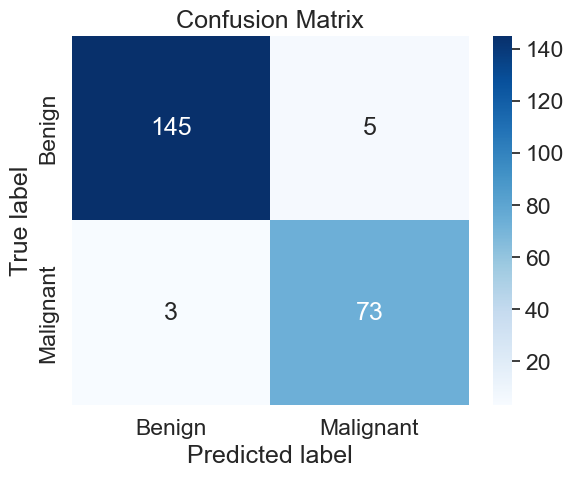

In [335]:
ConfMatrix = confusion_matrix(outputs_test, y_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Benign', 'Malignant'], yticklabels = ['Benign', 'Malignant'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

The top left Quadrant is 145 that were predicted as Benign and they are actually Benign so they are correct The bottom right Quadrant is 73 predicted as Malignant and they are actually Maligant so they are correct The top right Quadrant are 5 predicted as Benign but actually are Malignant. The bottom left Quadrant shows 3 predicted as Malignant and they are actually Benign.

In [233]:
# we need to find the optimal values for LogisticRegression Classifier for the Wisconsin Breast Cancer Dataset
params = {'C': [0.1, 1, 10, 100, 1000], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty':['none', 'l1', 'l2', 'elasticnet'], 'multi_class':['ovr']}

In [336]:
# Create an instance of LogisticRegression
lr = LogisticRegression()
# import Gridsearch library so we can find the optmal values for the Logistic Regression Classifier
from sklearn.model_selection import GridSearchCV

In [337]:
# Create an instance of GridSearchCV for LogisticRegression, parameters and cross fold validation = 5
logReg = GridSearchCV(estimator=lr, param_grid=params, cv=5, n_jobs=5, verbose=1)

In [338]:
# use best_params_ method to find the optimal values
logReg.fit(inputs, outputs)
print(logReg.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'saga'}


C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 464, in _check_solver
    raise ValueE

In [339]:
# Use these Valuse for LogistcRegression - {'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'saga'}
model = LogisticRegression(solver='saga', C=0.1, multi_class='ovr', penalty='l1', random_state=10)
scores = cross_val_score(model, inputs, outputs, cv=10, scoring='accuracy')

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: T

In [340]:
print(scores)

print(scores.mean())

[0.92753623 0.97101449 0.94202899 0.92647059 0.98529412 0.92647059
 0.97058824 0.98529412 0.97058824 0.98529412]
0.959057971014493


In [341]:
#lr = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=10)
l = LogisticRegression(solver='saga', C=0.1, multi_class='ovr', random_state=10)
scores = cross_val_score(l, inputs, outputs, cv=10, scoring='accuracy')

C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Teacher\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: T

In [342]:
print(scores)

print(scores.mean())

[0.92753623 0.95652174 0.92753623 0.92647059 0.98529412 0.94117647
 0.97058824 0.98529412 0.97058824 0.98529412]
0.9576300085251492


The best Accuracy score for LogisticRegression is 0.9575 or 95.73%

### Gaussian Naive Bayes Classifier

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [263]:
# Import the GaussianNB library for Naive Bayes
from sklearn.naive_bayes import GaussianNB

inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)
# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(inputs_train, outputs_train)

GaussianNB()

In [264]:
# Predict the response for the test dataset
y_pred = gnb.predict(inputs_test)

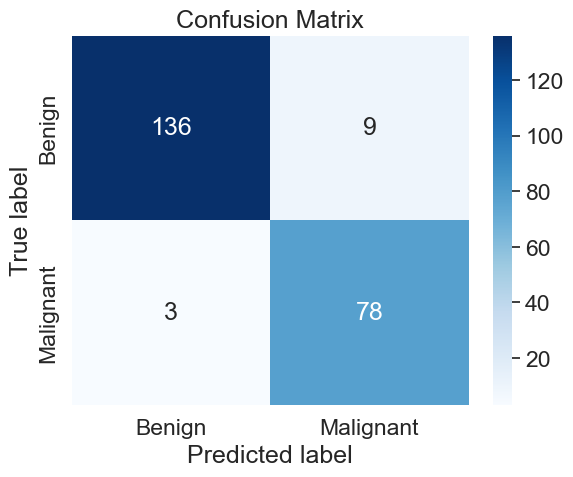

In [265]:
# Create the Confusion Matrix
ConfMatrix = confusion_matrix(outputs_test, y_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Benign', 'Malignant'], yticklabels = ['Benign', 'Malignant'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

The top left Quadrant is 146 that were predicted as Benign and they are actually Benign so they are correct The bottom right Quadrant is 76 predicted as Malignant and they are actually Maligant so they are correct The top right Quadrant are 3 predicted as Benign but actually are Malignant. The bottom left Quadrant shows 1 predicted as Malignant and they are actually Benign.

In [266]:
accuracy = accuracy_score(outputs_test,y_pred)
accuracy

0.9469026548672567

In [268]:
# Classification report
print(classification_report(outputs_test, y_pred))

              precision    recall  f1-score   support

           2       0.98      0.94      0.96       145
           4       0.90      0.96      0.93        81

    accuracy                           0.95       226
   macro avg       0.94      0.95      0.94       226
weighted avg       0.95      0.95      0.95       226



Next I will try a number of var_smoothing values to see which value improces the Accurracy

In [276]:
# Create an instance of GaussianNB with priors=None, var_smoothing=1e-07
gnb = GaussianNB(priors = None, var_smoothing = 1e-07)
scores = cross_val_score(gnb, inputs, outputs, cv=10, scoring='accuracy')

In [277]:
# Accuracy mean score for priors=None, var_smoothing=1e-07
print(scores)

print(scores.mean())

[0.91304348 0.95652174 0.94202899 0.94117647 0.98529412 0.94117647
 0.95588235 0.97058824 0.97058824 0.97058824]
0.9546888320545609


In [278]:
# Create an instance of GaussianNB with priors=None, var_smoothing=1e-08
gnb = GaussianNB(priors = None, var_smoothing = 1e-08)
scores = cross_val_score(gnb, inputs, outputs, cv=10, scoring='accuracy')

In [279]:
# Accuracy mean score for priors=None, var_smoothing=1e-08
print(scores)

print(scores.mean())

[0.91304348 0.95652174 0.94202899 0.94117647 0.98529412 0.94117647
 0.95588235 0.97058824 0.97058824 0.97058824]
0.9546888320545609


In [280]:
# Create an instance of GaussianNB with priors=None, var_smoothing=1e-09
gnb = GaussianNB(priors = None, var_smoothing = 1e-09)
scores = cross_val_score(gnb, inputs, outputs, cv=10, scoring='accuracy')

In [281]:
# Accuracy mean score for priors=None, var_smoothing=1e-9
print(scores)

print(scores.mean())

[0.91304348 0.95652174 0.94202899 0.94117647 0.98529412 0.94117647
 0.95588235 0.97058824 0.97058824 0.97058824]
0.9546888320545609


In [282]:
# Create an instance of GaussianNB with priors=None, var_smoothing=1e-10
gnb = GaussianNB(priors = None, var_smoothing = 1e-10)
scores = cross_val_score(gnb, inputs, outputs, cv=10, scoring='accuracy')

In [283]:
# Accuracy mean score for priors=None, var_smoothing=1e-10
print(scores)

print(scores.mean())

[0.91304348 0.95652174 0.94202899 0.94117647 0.98529412 0.94117647
 0.95588235 0.97058824 0.97058824 0.97058824]
0.9546888320545609


In [284]:
# Create an instance of GaussaianNB with var_smoothing=1e-11
gnb = GaussianNB(priors = None, var_smoothing = 1e-11)
scores = cross_val_score(gnb, inputs, outputs, cv=10, scoring='accuracy')

In [285]:
# Accuracy mean score for priors=None, var_smoothing=1e-11
print(scores)

print(scores.mean())

[0.91304348 0.95652174 0.94202899 0.94117647 0.98529412 0.94117647
 0.95588235 0.97058824 0.97058824 0.97058824]
0.9546888320545609


There doesn't seem to be any difference when using different var_smoothing values. The best accuracy value for GaussianNB is 0.9546 or 95.46%. 

### Support Vector Machine Classifier

Support Vector Machine are a set of supervised learning methods used for classification, regression and outliers detection.

In [153]:
#Create a svm Classifier with kernel = linear
clf = svm.SVC(kernel='linear') # Linear Kernel

In [154]:
# Carry out cross fold validation with the parameter cv = 10 
scores = cross_val_score(clf, inputs, outputs, cv=10, scoring='accuracy')

In [292]:
# get the mean score 
print(scores)

print(scores.mean())

[0.92753623 0.97101449 0.94202899 0.92647059 0.98529412 0.97058824
 0.95588235 0.98529412 0.97058824 0.98529412]
0.961999147485081


In [293]:
#Create a svm Classifier with kernel = rbf
clf = svm.SVC(kernel='rbf') # Linear Kernel

In [294]:
scores = cross_val_score(clf, inputs, outputs, cv=10, scoring='accuracy')

In [295]:
print(scores)

print(scores.mean())

[0.89855072 0.95652174 0.94202899 0.92647059 0.98529412 0.95588235
 0.97058824 0.98529412 0.97058824 0.98529412]
0.9576513213981244


In [160]:
# create an instance of support vector machine
svc = svm.SVC()

# import the Gridsearch library to find the optimal values for the SVC classifier and Wisconsin breats cancer dataset
from sklearn.model_selection import GridSearchCV

# Create a dictionary for each of the parameters C, gamma and kernel with values
params = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf', 'linear', 'sigmoid', 'poly']}

# We now use Gridsearch by creating an instance to find the optimal C, gamma and kernel values and use Cross fold Validation = 5 
clf = GridSearchCV(estimator=svc, param_grid=params, cv=5, n_jobs=5, verbose=1)

In [162]:
# Train the model
clf.fit(inputs, outputs)

# using the best_params method find the optimal values for each SVM model
print(clf.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


The result shows the optimal value are :  'C'= 0.1, 'gamma'= 1, 'kernel'= 'linear'

In [163]:
# Create an SVM instance with optimal values from best_params_ method
clf = svm.SVC(C=0.1, gamma=1, kernel='linear') # Linear Kernel

In [164]:
# now get the mean accuracy score using Cross Fold Validation = 5
scores = cross_val_score(clf, inputs, outputs, cv=5, scoring='accuracy')

In [165]:
# get the mean score
print(scores)

print(scores.mean())

[0.95620438 0.93430657 0.97810219 0.98529412 0.97794118]
0.9663696865607557


The best Accuracy score for Support Vector Machine is 0.9663 or 96.63%

## Forest

In [351]:
#from sklearn.model_selection import GridSearchCV
#params = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf', 'linear', 'sigmoid', 'poly']}

#clf = GridSearchCV(estimator=svc, param_grid=params, cv=5, n_jobs=5, verbose=1)

In [352]:
#clf.fit(inputs, outputs)
#print(clf.best_params_)

In [353]:
#params = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf', 'linear', 'sigmoid', 'poly']}
#params = {'n_estimators': [250], 'max_depth': [24], 'criterion':['entropy']}
params = {'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400], 'max_depth': [2, 3, 4, 5], 'criterion': ['entropy', 'gini']}

In [354]:
#rfc = RandomForestClassifier()
#rfc = GridSearchCV(estimator=rfc, param_grid=params, cv=5, n_jobs=5, verbose=1)

In [355]:
#rfc.fit(inputs, outputs)
#print(rfc.best_params_)

Get accuracy

In [356]:
#forest = RandomForestClassifier(n_estimators = 140, max_depth = 3, criterion = 'entropy')

In [357]:
#scores = cross_val_score(forest, inputs, outputs, cv=10, scoring='accuracy')

In [358]:
#print(scores)

#print(scores.mean())

In [380]:
# assign the Inputs and Outputs to run the Classifiers
inputs = df[['Uniformity of Cell Size', 'Bland Chromatin']]
#inputs = df[['Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Bland Chromatin', 'Normal Nucleoli']]
outputs = df['Class']

In [381]:
# Create an SVM instance with optimal values from best_params_ method
clf = svm.SVC(C=0.1, gamma=1, kernel='linear') # Linear Kernel

In [382]:
# now get the mean accuracy score using Cross Fold Validation = 5
scores = cross_val_score(clf, inputs, outputs, cv=10, scoring='accuracy')

In [383]:
# get the mean score
print(scores)

print(scores.mean())

[0.88405797 0.89855072 0.95652174 0.92647059 0.97058824 0.91176471
 0.95588235 0.97058824 0.97058824 0.98529412]
0.9430306905370844


## 7. Comparison of Literature Reviews on Classifiers with my Findings
***

To carry out the comparison between the literature reviews and my own findings or analysis I used the Accuracy score and created **Table 6** below and ranked the Classifiers by teh accuracy score and Literature review. 

| Ranking | Classifier | Literature Review  | Accuracy Score | No. Of Features used for Testing | 
| :---: | :---: | :---: | :---: | :---: | 
| 1 | SVM | Literature Review 3 | 97.8 | 3 |
| 1 | KNN | Literature Review 3 | 97.8 | 3 | 
| 3 | Naïve Bayes | Literature Review 2 | 97.36 | not known | 
| 4 | Naïve Bayes | Literature Review 1 | 97.27 |	not known |
| 5 | Random Forest | Literature Review 3 |	97.14 | 5 | 
| 5 | FLANN | Literature Review 3 | 97.14 | 5 | 
| 5 | Naïve Bayes | Literature Review 3 | 97.14 | 3 | 
| 8 | MLP | Literature Review 3 | 96.85 | 3 | 
| 9 | RBF Network | Literature Review 2 | 96.77 | not known | 
| 10 | SVM | John's Analysis | 96.63 | 8 |
| 11 | KNN | John's Analysis | 96.48 | 8 |  
| 12 | RandomForest | John's Analysis | 96.34 | 8 |
| 13 | SMO | Literature Review 1 | 96.13 | not known | 
| 13 | Multilayer Perceptron | Literature Review 1 | 96.13 | not known | 
| 14 | Logistic Regression | John's Analysis |	95.76 | 8 | 
| 15 | Random Forest | Literature Review 1 | 95.56 | not known | 
| 16 | Gaussain Naïve Bayes | John's Analysis | 95.46 | 8 |
| 17 | R48 | Literature Review 1 |	94.26 | not known | 
| 18 | R48 | Literature Review 2 | 93.41 | not known | 

                                                      Table 6

You can see from teh Table that Support Vector Machine (SVM) and K-Nearest Neighbor (KNN) are joined top with an Accuracy score of 97.8% or 0.987. Both of these were carried out in literature review 3 (*Feature Importance Score-Based Functional Link Artificial Neural Networks for Breast Cancer Classification*). It also should be noted that they used 3 Features or attributes to get these scores. Then Naive Bayes is ranked 3rd and 4th under Literature review 2 (*Prediction of benign and malignant breast cancer using data mining techniques*) and literature 1 (*Analysis of Wisconsin Breast Cancer original dataset using data mining and machine learning algorithms for breast cancer prediction*). They scored 97.37% and 97.27%<br/>
The top 5 is made up of RandomForest, Flann and Naive Bayes again from Literature Review 3 each scoring 97.14%. Again a limited subset of features were used on the dataset.<br/>
The Naive Bayes Classifier seems to be a good predictor although my Accuracy score on the GaussainNB was 95.46% which was at the bottom.<br/>
My best performing Classifier was Support Vector Machine (SVM) which came in ranked 10th and scored an Accuracy of 96.63%. I tried reducing the number of features to four which were 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Bland Chromatin', 'Normal Nucleoli' and it didn't seem to make a difference to the Accuracy score. I even tried reducing the number of features to three and two but they didn't seem to work either.

One other method to try and improve performance of the Classifiers would be to increase the Cross Fold Validation to a higher value and see does it make a difference. I will try this in the future to see if it makes a difference.

Questions to pose is 97.8% a good enough score ? roughly 2 people would be diagnosed incorrectly in every 100.
R48 is teh worst performing Classifier. 


## 8. Discuss How Dataset Could be Extended
***

In [10]:
from sdv.tabular import GaussianCopula

In [34]:
model = GaussianCopula()
model.fit(df)

In [35]:
sample = model.sample(10000)
sample.head()

,Sample code number id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,745360,1,1,1,1,1,1,1,1,1,Benign
1,295958,5,3,3,4,2,4,7,2,4,Benign
2,113911,10,5,6,4,6,9,6,5,3,Benign
3,946729,8,5,6,3,4,4,4,6,4,Malignant
4,1250780,9,8,5,6,5,6,4,5,3,Benign


In [36]:
from sdv.evaluation import evaluate
evaluate(sample, df, metrics=['CSTest'], aggregate=False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,CSTest,Chi-Squared,0.953141,0.953141,0.0,1.0,MAXIMIZE,None


In [37]:
sample['Class']

0          Benign
1          Benign
2          Benign
3       Malignant
4          Benign
          ...    
9995       Benign
9996       Benign
9997       Benign
9998       Benign
9999       Benign
Name: Class, Length: 10000, dtype: object

In [38]:
# Check number rows and columns
print(df.shape)

# Count by Class attribute so we can see number of Benigns and Malignant
print(sample["Class"].value_counts())

(683, 11)
Benign       6781
Malignant    3219
Name: Class, dtype: int64


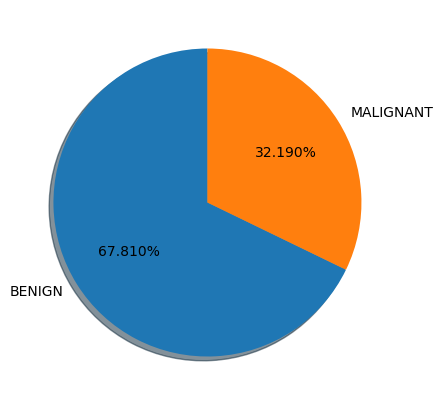

In [39]:
# Create a Pie Chart by Class to show the percentage of Benign and Malignant 
plt.figure(figsize=(5,5))
plt.pie(sample['Class'].value_counts(),startangle=90,autopct='%1.3f%%',labels=['BENIGN','MALIGNANT'],shadow=True)
plt.show()

## 9. References
***

https://www.sciencedirect.com/science/article/pii/S2352914820306092

https://rpubs.com/gregmaghakian/429325

https://sparkbyexamples.com/pandas/pandas-convert-column-to-int/

https://www.w3schools.com/python/python_ml_confusion_matrix.asp

https://www.v7labs.com/blog/confusion-matrix-guide

https://www.journalbinet.com/uploads/2/1/0/0/21005390/67.02.09.2020_analysis_of_wisconsin_breast_cancer_original_dataset_using_data_mining_and_machine_learning_algorithms_for_breast_cancer_prediction.pdf

https://www.kaggle.com/code/juanmah/tactic-03-hyperparameter-optimization-gnb


https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/

https://pyonlycode.com/post/how-to-solve-nameerror-name-logisticregression-is-not-defined-sklearn/

https://www.simplilearn.com/tutorials/machine-learning-tutorial/random-forest-algorithm

https://towardsdatascience.com/k-nearest-neighbors-94395f445221

https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

https://www.tutorialspoint.com/machine_learning_with_python/classification_algorithms_logistic_regression.htm


## END
***